flatten_learn.ipynb

Author: Anderson Steckler

Use Dutriex plot to learn how to apply STM post process flatten

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
img = Image.open('fig1a.png').convert('L') # Grayscale
img = np.array(img)

np.shape(img)

(385, 385)

Text(0.5, 1.0, 'Dutreix Fig1a')

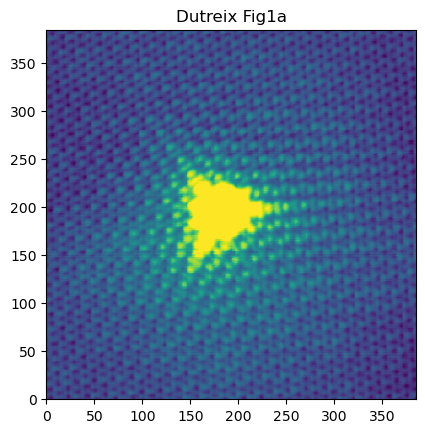

In [3]:
fig, ax = plt.subplots()

ax.pcolormesh(img)
ax.set_aspect('equal')
ax.set_title('Dutreix Fig1a')

In [86]:
def g(x, a, s, x0):
    return a * np.exp(-(x-x0)**2 / s)

def f(x, m):
    return m/g(x, 8700, 500, 75)

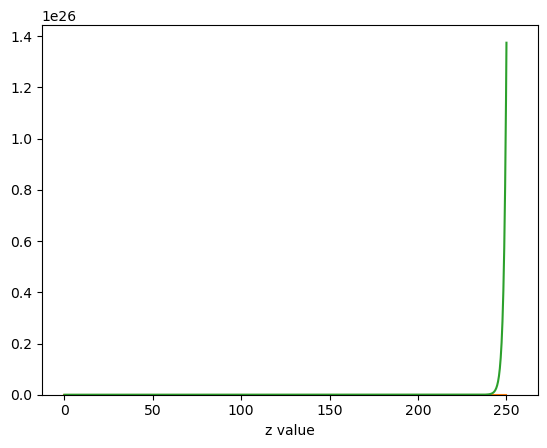

In [87]:
# Crude Flatten
# Document all color ranges in histogram
zvals = img.flatten()

xlin = np.linspace(0, 250, 1000)
gvec = np.vectorize(g)

fig, ax = plt.subplots()
ax.hist(zvals, bins=100)
ax.plot(xlin, gvec(xlin, 8700, 500, 75))
ax.plot(xlin, f(xlin, 3000))
ax.set_xlabel('z value')
plt.show()

In [88]:
zflat = np.array([z * f(z, 4000) for z in zvals])

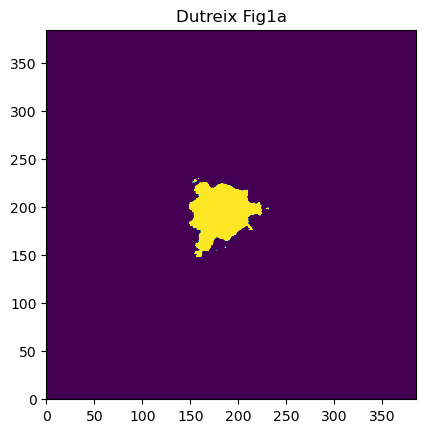

In [89]:
fig1, ax1 = plt.subplots()

zflat.resize(np.shape(img))

ax1.pcolormesh(zflat)
ax1.set_title('Dutreix Fig1a')
ax1.set_aspect('equal')